In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.precision', 3)

## Determine URLs needed to extract Turnstile Data
##### Date Range: 
>April to May (2016 to 2019)

In [3]:
url_prefix = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'

In [4]:
start_date = '160402'
date = dt.date(int(start_date[:2]), int(start_date[2:4]), int(start_date[4:]))

In [5]:
date2 = date + dt.timedelta(days=7)

In [6]:
str(date2)[2:4]+str(date2)[5:7]+str(date2)[8:]

'160409'

In [7]:
# Create list of dates (by week) from April to end of May 2016
date_txt_2016 = '160402'
date_2016 = dt.date(int(start_date[:2]), int(start_date[2:4]), int(start_date[4:]))

date_list = [date_txt_2016]

In [8]:
    
while date_2016 < dt.date(16,6,1):
    date_2016 += dt.timedelta(days=7)
    date_list.append(str(date_2016)[2:4]+str(date_2016)[5:7]+str(date_2016)[8:])


In [9]:
date_list

['160402',
 '160409',
 '160416',
 '160423',
 '160430',
 '160507',
 '160514',
 '160521',
 '160528',
 '160604']

In [10]:
urls = []
for date in date_list:
        
    

SyntaxError: unexpected EOF while parsing (<ipython-input-10-fb57ad65b587>, line 4)

## Data Frame to Summarize Turnstile Entries & Exits

In [11]:
# Read pickled datafile
turnstile_df = pd.read_pickle('data.pkl')

In [12]:
turnstile_df['ENTRIES'] = turnstile_df['ENTRIES'].astype(np.int)
turnstile_df['EXITS'] = turnstile_df['EXITS'].astype(np.int)
turnstile_df['DATE'] = turnstile_df['DATE'].astype('datetime64[ns]')

In [13]:
turnstile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10303675 entries, 0 to 10303674
Data columns (total 11 columns):
C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        datetime64[ns]
TIME        object
DESC        object
ENTRIES     int64
EXITS       int64
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 864.7+ MB


In [14]:
turnstile_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

#### Extract Date & Time Features:

In [15]:
date = pd.to_datetime(turnstile_df['DATE'], format='%m/%d/%Y')
time = pd.to_datetime(turnstile_df['TIME'], format='%H:%M:%S')

turnstile_df['year'] = date.dt.year
turnstile_df['month'] = date.dt.month
turnstile_df['day_of_week'] = date.dt.weekday
turnstile_df['hour'] = time.dt.hour
turnstile_df['minute'] = time.dt.minute

In [16]:
# Create concatenated field for Turnstile Key (UNIT + SCP)
turnstile_df.insert(0, 'TURNSTILE', turnstile_df['UNIT']+'|'+turnstile_df['SCP'])

In [17]:
# Create field to flag weekday or weekend transactions
turnstile_df.loc[turnstile_df['day_of_week'] < 5, 'WD vs WE'] = 'WD'
turnstile_df.loc[turnstile_df['day_of_week'] > 4, 'WD vs WE'] = 'WE'

In [18]:
turnstile_df.head(10)

,TURNSTILE,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,year,month,day_of_week,hour,minute,WD vs WE
0,R051|02-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-23,00:00:00,REGULAR,6989774,2370411,2019,3,5,0,0,WE
1,R051|02-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-23,04:00:00,REGULAR,6989795,2370413,2019,3,5,4,0,WE
2,R051|02-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-23,08:00:00,REGULAR,6989813,2370436,2019,3,5,8,0,WE
3,R051|02-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-23,12:00:00,REGULAR,6989924,2370512,2019,3,5,12,0,WE
4,R051|02-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-23,16:00:00,REGULAR,6990200,2370573,2019,3,5,16,0,WE
5,R051|02-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-23,20:00:00,REGULAR,6990562,2370623,2019,3,5,20,0,WE
6,R051|02-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-24,00:00:00,REGULAR,6990734,2370648,2019,3,6,0,0,WE
7,R051|02-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-24,04:00:00,REGULAR,6990758,2370653,2019,3,6,4,0,WE
8,R051|02-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-24,08:00:00,REGULAR,6990772,2370676,2019,3,6,8,0,WE
9,R051|02-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-24,12:00:00,REGULAR,6990860,2370731,2019,3,6,12,0,WE


# Calculate number of entries in each time period (`entries_delta`)

- Group DataFrame by turnstile and sort by date
- Define an appropriate time period
- Check for inconsistent data

In order to identify unique turnstiles, we use two key definitions from the [MTA transit toolkit](http://transitdatatoolkit.com/lessons/subway-turnstile-data/):

- `UNIT`: The remote unit is a collection of turnstiles... there can be multiple remote units one station
- `SCP`: Subunit channel position represents a turnstile... the same number can be used at different stations

Together, `UNIT` and `SCP` make a unique identifier for NYC turnstiles. 

In [19]:
# Create dataframe that consolidates each Turnstile (Unit + SCP); take the max entries & exits
# This will be used to determine the difference between Entries & Exits for each day
cons_turnstile_df = turnstile_df    \
                        .groupby(['TURNSTILE', 'STATION', 'DATE', 'year', 'hour', 'WD vs WE'])    \
                        .agg({'ENTRIES':'max', 'EXITS':'max'}).reset_index()

In [20]:
cons_turnstile_df.sort_values(['TURNSTILE', 'STATION', 'DATE', 'year', 'hour', 'WD vs WE'], inplace=True)

In [21]:
cons_turnstile_df.head(10)

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS
0,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,0,WE,1699119,1615179
1,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,4,WE,1699131,1615186
2,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,8,WE,1699154,1615191
3,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,12,WE,1699294,1615253
4,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,16,WE,1699516,1615328
5,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,20,WE,1699746,1615404
6,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,0,WE,1699792,1615423
7,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,4,WE,1699799,1615426
8,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,8,WE,1699817,1615432
9,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,12,WE,1699887,1615472


In [22]:
#NOT USED - outdated assumptions

cons_turnstile_df['Entries Delta'] = cons_turnstile_df['ENTRIES']    \
                                            .rolling(2)    \
                                            .apply(lambda x: x[1]-x[0] if abs(x[1]-x[0]) < 5000 else np.nan ,raw=True)


In [23]:
cons_turnstile_df.head(10)

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta
0,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,0,WE,1699119,1615179,NaN
1,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,4,WE,1699131,1615186,12.0
2,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,8,WE,1699154,1615191,23.0
3,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,12,WE,1699294,1615253,140.0
4,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,16,WE,1699516,1615328,222.0
5,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,20,WE,1699746,1615404,230.0
6,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,0,WE,1699792,1615423,46.0
7,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,4,WE,1699799,1615426,7.0
8,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,8,WE,1699817,1615432,18.0
9,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,12,WE,1699887,1615472,70.0


In [24]:
cons_turnstile_df[cons_turnstile_df['Entries Delta'] < 0]

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta
61519,R001|02-06-01,SOUTH FERRY,2016-02-27,2016,0,WE,1,167,-1781.0
64824,R001|02-06-03,SOUTH FERRY,2018-02-24,2018,0,WE,2,23,-190.0
67042,R001|02-06-05,SOUTH FERRY,2018-02-24,2018,0,WE,1,26,-178.0
120368,R007|00-00-02,104 ST,2016-02-27,2016,7,WE,2026156755,622219189,-31.0
120369,R007|00-00-02,104 ST,2016-02-27,2016,11,WE,2026156690,622219172,-65.0
...,...,...,...,...,...,...,...,...,...
10145765,R552|00-01-00,JOURNAL SQUARE,2017-04-08,2017,11,WE,370,263,-2649.0
10145836,R552|00-01-00,JOURNAL SQUARE,2017-04-20,2017,21,WD,127,1384,-1924.0
10149512,R552|00-01-02,JOURNAL SQUARE,2018-05-09,2018,11,WD,2,0,-7.0
10149521,R552|00-01-02,JOURNAL SQUARE,2018-05-11,2018,12,WD,166,58,-148.0


In [25]:
cons_turnstile_df.iloc[120360:120375, :]

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta
120360,R007|00-00-01,104 ST,2019-05-23,2019,20,WD,1121292500,1907495231,57.0
120361,R007|00-00-01,104 ST,2019-05-24,2019,0,WD,1121292518,1907495171,18.0
120362,R007|00-00-01,104 ST,2019-05-24,2019,4,WD,1121292523,1907495166,5.0
120363,R007|00-00-01,104 ST,2019-05-24,2019,8,WD,1121292725,1907495133,202.0
120364,R007|00-00-01,104 ST,2019-05-24,2019,12,WD,1121292859,1907495096,134.0
120365,R007|00-00-01,104 ST,2019-05-24,2019,16,WD,1121292940,1907495022,81.0
120366,R007|00-00-01,104 ST,2019-05-24,2019,20,WD,1121293020,1907494900,80.0
120367,R007|00-00-02,104 ST,2016-02-27,2016,3,WE,2026156786,622219196,NaN
120368,R007|00-00-02,104 ST,2016-02-27,2016,7,WE,2026156755,622219189,-31.0
120369,R007|00-00-02,104 ST,2016-02-27,2016,11,WE,2026156690,622219172,-65.0


In [26]:
cons_turnstile_df2 = cons_turnstile_df.copy()
cons_turnstile_df2.drop(columns=['Entries Delta'], inplace=True)

In [27]:
# Used to calculate deltas (any entry or exit values that are < 0 or 
# > 4800 are considered anomalies)
# groupby turnstile and year so apply function knows where to start and
# stop window

cons_turnstile_df2['Entries Delta'] = cons_turnstile_df2.groupby(['TURNSTILE', 'year'])['ENTRIES']    \
                        .apply(lambda x: x.rolling(2)    \
                        .apply(lambda x: x[1] - x[0] if ((x[1] - x[0]) >= 0) and    \
                               ((x[1] - x[0]) <= 4800) else np.nan, raw=True))

In [28]:
cons_turnstile_df2['Exits Delta'] = cons_turnstile_df2.groupby(['TURNSTILE', 'year'])['EXITS']    \
                        .apply(lambda x: x.rolling(2)    \
                        .apply(lambda x: x[1] - x[0] if ((x[1] - x[0]) >= 0) and    \
                               ((x[1] - x[0]) <= 4800) else np.nan, raw=True))

In [29]:
cons_turnstile_df2['Cum. Entries & Exits'] = cons_turnstile_df2['Entries Delta'] + cons_turnstile_df2['Exits Delta']

In [30]:
cons_turnstile_df2.head(10)

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta,Exits Delta,Cum. Entries & Exits
0,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,0,WE,1699119,1615179,NaN,NaN,NaN
1,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,4,WE,1699131,1615186,12.0,7.0,19.0
2,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,8,WE,1699154,1615191,23.0,5.0,28.0
3,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,12,WE,1699294,1615253,140.0,62.0,202.0
4,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,16,WE,1699516,1615328,222.0,75.0,297.0
5,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,20,WE,1699746,1615404,230.0,76.0,306.0
6,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,0,WE,1699792,1615423,46.0,19.0,65.0
7,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,4,WE,1699799,1615426,7.0,3.0,10.0
8,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,8,WE,1699817,1615432,18.0,6.0,24.0
9,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,12,WE,1699887,1615472,70.0,40.0,110.0


In [31]:
# Create Key in cons_turnstile_df2 for TURNSTILE + hour
cons_turnstile_df2['TURNSTILE'] = cons_turnstile_df2['TURNSTILE'].astype(str)
cons_turnstile_df2['hour'] = cons_turnstile_df2['hour'].astype(str)
cons_turnstile_df2['turnstile_hour_key'] = cons_turnstile_df2['TURNSTILE'] + '|' + cons_turnstile_df2['hour']
cons_turnstile_df2.head(10)

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta,Exits Delta,Cum. Entries & Exits,turnstile_hour_key
0,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,0,WE,1699119,1615179,NaN,NaN,NaN,R001|00-00-00|0
1,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,4,WE,1699131,1615186,12.0,7.0,19.0,R001|00-00-00|4
2,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,8,WE,1699154,1615191,23.0,5.0,28.0,R001|00-00-00|8
3,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,12,WE,1699294,1615253,140.0,62.0,202.0,R001|00-00-00|12
4,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,16,WE,1699516,1615328,222.0,75.0,297.0,R001|00-00-00|16
5,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,20,WE,1699746,1615404,230.0,76.0,306.0,R001|00-00-00|20
6,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,0,WE,1699792,1615423,46.0,19.0,65.0,R001|00-00-00|0
7,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,4,WE,1699799,1615426,7.0,3.0,10.0,R001|00-00-00|4
8,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,8,WE,1699817,1615432,18.0,6.0,24.0,R001|00-00-00|8
9,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,12,WE,1699887,1615472,70.0,40.0,110.0,R001|00-00-00|12


##### NOTE:
**"cons_turnstile_df2"** to be used further down for merging with **"avg_volume_df"**

### CALCULATE THE AVERAGE VOLUME (by Turnstile for each hour timeslot)

In [32]:
#NaN values are removed in this dataframe

cons_turnstile_df3 = cons_turnstile_df2.groupby(['TURNSTILE', 'STATION', 'DATE', 'WD vs WE', 'hour'])    \
                                       .agg({'Cum. Entries & Exits':'sum'}).reset_index()
cons_turnstile_df3.head(100)

,TURNSTILE,STATION,DATE,WD vs WE,hour,Cum. Entries & Exits
0,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,WE,0,0.0
1,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,WE,12,202.0
2,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,WE,16,297.0
3,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,WE,20,306.0
4,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,WE,4,19.0
5,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,WE,8,28.0
6,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,WE,0,65.0
7,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,WE,12,110.0
8,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,WE,16,268.0
9,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,WE,20,233.0


In [33]:
cons_turnstile_df3['Cum. Entries & Exits'].isnull().sum()

0

In [34]:
# Create Key in cons_turnstile_df3 for TURNSTILE + hour
cons_turnstile_df3['TURNSTILE'] = cons_turnstile_df3['TURNSTILE'].astype(str)
cons_turnstile_df3['hour'] = cons_turnstile_df3['hour'].astype(str)
cons_turnstile_df3['turnstile_hour_key'] = cons_turnstile_df3['TURNSTILE'] + '|' + cons_turnstile_df3['hour']
cons_turnstile_df3

,TURNSTILE,STATION,DATE,WD vs WE,hour,Cum. Entries & Exits,turnstile_hour_key
0,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,WE,0,0.0,R001|00-00-00|0
1,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,WE,12,202.0,R001|00-00-00|12
2,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,WE,16,297.0,R001|00-00-00|16
3,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,WE,20,306.0,R001|00-00-00|20
4,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,WE,4,19.0,R001|00-00-00|4
...,...,...,...,...,...,...,...
10244275,R572|01-03-04,96 ST-2 AVE,2019-05-24,WD,17,430.0,R572|01-03-04|17
10244276,R572|01-03-04,96 ST-2 AVE,2019-05-24,WD,21,383.0,R572|01-03-04|21
10244277,R572|01-03-04,96 ST-2 AVE,2019-05-24,WD,5,15.0,R572|01-03-04|5
10244278,R572|01-03-04,96 ST-2 AVE,2019-05-24,WD,8,360.0,R572|01-03-04|8


In [35]:
# Create average_volume_df to contain average total entries & exits for each Turnstile for every hour timeslot
average_volume_df = cons_turnstile_df3.groupby(['TURNSTILE', 'hour']).agg({'Cum. Entries & Exits':'mean'}).reset_index()
average_volume_df.rename(columns={'Cum. Entries & Exits': 'Mean Entries & Exits'}, inplace=True)

# Create Key in cons_turnstile_df3 for TURNSTILE + hour
average_volume_df['TURNSTILE'] = average_volume_df['TURNSTILE'].astype(str)
average_volume_df['hour'] = average_volume_df['hour'].astype(str)
average_volume_df['turnstile_hour_key'] = average_volume_df['TURNSTILE'] + '|' + average_volume_df['hour']

average_volume_df.drop(columns=['TURNSTILE', 'hour'], inplace=True)
average_volume_df.head(100)

,Mean Entries & Exits,turnstile_hour_key
0,224.344,R001|00-00-00|0
1,206.833,R001|00-00-00|1
2,87.000,R001|00-00-00|10
3,156.000,R001|00-00-00|11
4,609.918,R001|00-00-00|12
5,576.192,R001|00-00-00|13
6,552.770,R001|00-00-00|16
7,717.126,R001|00-00-00|17
8,620.000,R001|00-00-00|18
9,26.000,R001|00-00-00|19


### CREATE FINAL MERGED TABLE WITH ORIGINAL DATA + AVG ENTRIES & EXITS

In [36]:
cons_turnstile_df4 = pd.merge(cons_turnstile_df2, average_volume_df, on='turnstile_hour_key', how='left')
cons_turnstile_df4

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta,Exits Delta,Cum. Entries & Exits,turnstile_hour_key,Mean Entries & Exits
0,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,0,WE,1699119,1615179,NaN,NaN,NaN,R001|00-00-00|0,224.344
1,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,4,WE,1699131,1615186,12.0,7.0,19.0,R001|00-00-00|4,58.883
2,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,8,WE,1699154,1615191,23.0,5.0,28.0,R001|00-00-00|8,334.129
3,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,12,WE,1699294,1615253,140.0,62.0,202.0,R001|00-00-00|12,609.918
4,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,16,WE,1699516,1615328,222.0,75.0,297.0,R001|00-00-00|16,552.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10244275,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,8,WD,1087904,359253,302.0,58.0,360.0,R572|01-03-04|8,200.217
10244276,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,9,WD,1087999,359263,95.0,10.0,105.0,R572|01-03-04|9,419.869
10244277,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,13,WD,1088284,359320,285.0,57.0,342.0,R572|01-03-04|13,362.868
10244278,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,17,WD,1088621,359413,337.0,93.0,430.0,R572|01-03-04|17,370.285


In [37]:
cons_turnstile_df4[np.isnan(cons_turnstile_df4['Cum. Entries & Exits'])]

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta,Exits Delta,Cum. Entries & Exits,turnstile_hour_key,Mean Entries & Exits
0,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,0,WE,1699119,1615179,NaN,NaN,NaN,R001|00-00-00|0,224.344
551,R001|00-00-00,WHITEHALL S-FRY,2017-02-25,2017,0,WE,2243265,1838586,NaN,NaN,NaN,R001|00-00-00|0,224.344
1102,R001|00-00-00,WHITEHALL S-FRY,2018-02-24,2018,0,WE,3097287,2197711,NaN,NaN,NaN,R001|00-00-00|0,224.344
1647,R001|00-00-00,WHITEHALL S-FRY,2019-02-23,2019,0,WE,4104196,2551855,NaN,NaN,NaN,R001|00-00-00|0,224.344
2199,R001|00-00-01,WHITEHALL S-FRY,2016-02-27,2016,0,WE,1411875,1122986,NaN,NaN,NaN,R001|00-00-01|0,216.688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10241547,R572|01-03-03,96 ST-2 AVE,2018-02-24,2018,0,WE,322786,220740,NaN,NaN,NaN,R572|01-03-03|0,147.875
10242095,R572|01-03-03,96 ST-2 AVE,2019-02-23,2019,0,WE,574398,410054,NaN,NaN,NaN,R572|01-03-03|0,147.875
10242641,R572|01-03-04,96 ST-2 AVE,2017-02-25,2017,0,WE,64198,17592,NaN,NaN,NaN,R572|01-03-04|0,173.521
10243186,R572|01-03-04,96 ST-2 AVE,2018-02-24,2018,0,WE,517237,167474,NaN,NaN,NaN,R572|01-03-04|0,173.521


### REPLACE ALL NaN Values in "Cum. Entries & Exits" with MEAN

In [39]:
cons_turnstile_df5 = cons_turnstile_df4.copy()

In [40]:
cons_turnstile_df5.loc[np.isnan(cons_turnstile_df5['Cum. Entries & Exits']),'Cum. Entries & Exits'] = cons_turnstile_df5['Mean Entries & Exits']


In [41]:
cons_turnstile_df5['hour'] = cons_turnstile_df5['hour'].astype(int)

In [42]:
cons_turnstile_df5

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta,Exits Delta,Cum. Entries & Exits,turnstile_hour_key,Mean Entries & Exits
0,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,0,WE,1699119,1615179,NaN,NaN,224.344,R001|00-00-00|0,224.344
1,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,4,WE,1699131,1615186,12.0,7.0,19.000,R001|00-00-00|4,58.883
2,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,8,WE,1699154,1615191,23.0,5.0,28.000,R001|00-00-00|8,334.129
3,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,12,WE,1699294,1615253,140.0,62.0,202.000,R001|00-00-00|12,609.918
4,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,16,WE,1699516,1615328,222.0,75.0,297.000,R001|00-00-00|16,552.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10244275,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,8,WD,1087904,359253,302.0,58.0,360.000,R572|01-03-04|8,200.217
10244276,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,9,WD,1087999,359263,95.0,10.0,105.000,R572|01-03-04|9,419.869
10244277,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,13,WD,1088284,359320,285.0,57.0,342.000,R572|01-03-04|13,362.868
10244278,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,17,WD,1088621,359413,337.0,93.0,430.000,R572|01-03-04|17,370.285


In [43]:
cons_turnstile_df5['hour'].unique()

array([ 0,  4,  8, 12, 16, 20,  5,  9, 13, 17, 21,  1,  7, 10, 11, 18, 19,
       14,  3, 15, 23,  6, 22,  2])

### Create new DF to remove rows with timestamp below 8am and above 8pm

In [46]:
cons_turnstile_df6 = cons_turnstile_df5[(cons_turnstile_df5['hour'] > 7) & (cons_turnstile_df5['hour'] < 21)]
cons_turnstile_df6['hour'].unique()

array([ 8, 12, 16, 20,  9, 13, 17, 10, 11, 18, 19, 14, 15])

In [47]:
cons_turnstile_df6

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta,Exits Delta,Cum. Entries & Exits,turnstile_hour_key,Mean Entries & Exits
2,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,8,WE,1699154,1615191,23.0,5.0,28.0,R001|00-00-00|8,334.129
3,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,12,WE,1699294,1615253,140.0,62.0,202.0,R001|00-00-00|12,609.918
4,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,16,WE,1699516,1615328,222.0,75.0,297.0,R001|00-00-00|16,552.770
5,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,20,WE,1699746,1615404,230.0,76.0,306.0,R001|00-00-00|20,772.254
8,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,8,WE,1699817,1615432,18.0,6.0,24.0,R001|00-00-00|8,334.129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10244271,R572|01-03-04,96 ST-2 AVE,2019-05-23,2019,17,WD,1087217,358945,328.0,83.0,411.0,R572|01-03-04|17,370.285
10244275,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,8,WD,1087904,359253,302.0,58.0,360.0,R572|01-03-04|8,200.217
10244276,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,9,WD,1087999,359263,95.0,10.0,105.0,R572|01-03-04|9,419.869
10244277,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,13,WD,1088284,359320,285.0,57.0,342.0,R572|01-03-04|13,362.868


In [48]:
cons_turnstile_df6

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta,Exits Delta,Cum. Entries & Exits,turnstile_hour_key,Mean Entries & Exits
2,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,8,WE,1699154,1615191,23.0,5.0,28.0,R001|00-00-00|8,334.129
3,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,12,WE,1699294,1615253,140.0,62.0,202.0,R001|00-00-00|12,609.918
4,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,16,WE,1699516,1615328,222.0,75.0,297.0,R001|00-00-00|16,552.770
5,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,20,WE,1699746,1615404,230.0,76.0,306.0,R001|00-00-00|20,772.254
8,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,8,WE,1699817,1615432,18.0,6.0,24.0,R001|00-00-00|8,334.129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10244271,R572|01-03-04,96 ST-2 AVE,2019-05-23,2019,17,WD,1087217,358945,328.0,83.0,411.0,R572|01-03-04|17,370.285
10244275,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,8,WD,1087904,359253,302.0,58.0,360.0,R572|01-03-04|8,200.217
10244276,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,9,WD,1087999,359263,95.0,10.0,105.0,R572|01-03-04|9,419.869
10244277,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,13,WD,1088284,359320,285.0,57.0,342.0,R572|01-03-04|13,362.868


## PLOTTING DATA:

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Weekday dataframe
turnstile_wd_df = cons_turnstile_df6[cons_turnstile_df6['WD vs WE'] == 'WD']
turnstile_wd_df

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta,Exits Delta,Cum. Entries & Exits,turnstile_hour_key,Mean Entries & Exits
14,R001|00-00-00,WHITEHALL S-FRY,2016-02-29,2016,8,WD,1700386,1615652,99.0,25.0,124.0,R001|00-00-00|8,334.129
15,R001|00-00-00,WHITEHALL S-FRY,2016-02-29,2016,12,WD,1700602,1615748,216.0,96.0,312.0,R001|00-00-00|12,609.918
16,R001|00-00-00,WHITEHALL S-FRY,2016-02-29,2016,16,WD,1700725,1615781,123.0,33.0,156.0,R001|00-00-00|16,552.770
17,R001|00-00-00,WHITEHALL S-FRY,2016-02-29,2016,20,WD,1700940,1615845,215.0,64.0,279.0,R001|00-00-00|20,772.254
20,R001|00-00-00,WHITEHALL S-FRY,2016-03-01,2016,8,WD,1701059,1615876,90.0,15.0,105.0,R001|00-00-00|8,334.129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10244271,R572|01-03-04,96 ST-2 AVE,2019-05-23,2019,17,WD,1087217,358945,328.0,83.0,411.0,R572|01-03-04|17,370.285
10244275,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,8,WD,1087904,359253,302.0,58.0,360.0,R572|01-03-04|8,200.217
10244276,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,9,WD,1087999,359263,95.0,10.0,105.0,R572|01-03-04|9,419.869
10244277,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,13,WD,1088284,359320,285.0,57.0,342.0,R572|01-03-04|13,362.868


# Plot 30 busiest stations on weekdays (based on average number of entries/exits per day)

In [101]:
#Find sum of entries/exits per day per station
ts_wd_station_day_df = turnstile_wd_df.groupby(['STATION', 'DATE'])    \
                                       .agg({'Cum. Entries & Exits':'sum'}).reset_index()

#Find average number of entries/exits per day per station
ts_wd_station_df = ts_wd_station_day_df.groupby(['STATION'])    \
                                       .agg({'Cum. Entries & Exits':'mean'}).reset_index()
ts_wd_station_df.sort_values(['Cum. Entries & Exits'], inplace=True)

#30 busiest stations on weekdays
ts_wd_top30_station_df = ts_wd_station_df.tail(30).reset_index()
ts_wd_top30_station_df

,index,STATION,Cum. Entries & Exits
0,156,BOROUGH HALL,57260.151
1,252,JAMAICA CENTER,57758.109
2,97,72 ST,59275.896
3,254,JAY ST-METROTEC,64123.787
4,52,28 ST,71471.153
5,257,JKSN HT-ROOSVLT,71711.912
6,125,ATL AV-BARCLAY,72649.838
7,67,42 ST-BRYANT PK,73910.496
8,368,WALL ST,76893.516
9,78,50 ST,77420.973


##### Potential Stations near Tech Companies

Flatiron District
- **14th (#18)**
- **23rd (#4)**
- **28th (#26)**
- 33rd

Financial District
- **Wall St [2,3] (#22)**
- Broad St [J,Z]
- **Wall St [4,5] (#22)**
- Broadway/Rector St
- Broadway/Exchange Al

Dumbo
- York Street
- High Street

Midtown
- **Times Sq-42 St (#5)**
- **34 St - Penn Station (#1)**
- **42 St - Bryant Park Station (#23)**
- **Grand Central - 42 St (#2)**
- **34 St - Herald Square (#3)**

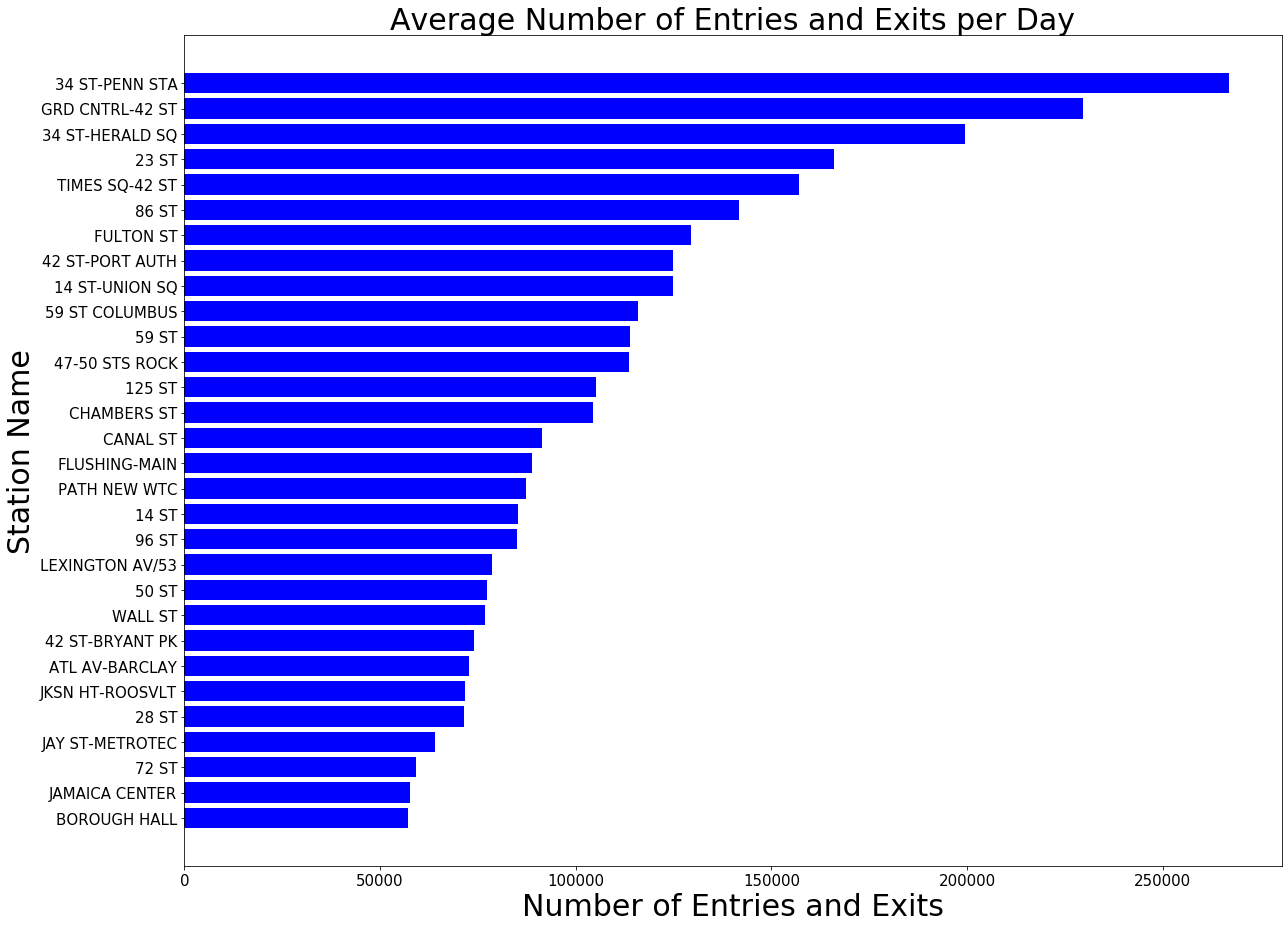

In [160]:
station_list = list(range(30))
plt.figure(figsize = [18,13])
plt.barh(station_list, width=ts_wd_top30_station_df['Cum. Entries & Exits'], height=0.8, align='center', color = 'blue')
plt.xticks(fontsize = 15);
plt.yticks(station_list, ts_wd_top30_station_df['STATION'], fontsize = 15);

plt.xlabel('Number of Entries and Exits', fontsize = 30)
plt.ylabel('Station Name', fontsize = 30);
plt.title('Average Number of Entries and Exits per Day',fontsize = 30);
plt.tight_layout()


# Compare busiest weekday stations with busiest weekend stations

In [132]:
# Weekend dataframe
turnstile_we_df = cons_turnstile_df6[cons_turnstile_df6['WD vs WE'] == 'WE']
turnstile_we_df

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta,Exits Delta,Cum. Entries & Exits,turnstile_hour_key,Mean Entries & Exits
2,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,8,WE,1699154,1615191,23.0,5.0,28.0,R001|00-00-00|8,334.129
3,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,12,WE,1699294,1615253,140.0,62.0,202.0,R001|00-00-00|12,609.918
4,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,16,WE,1699516,1615328,222.0,75.0,297.0,R001|00-00-00|16,552.770
5,R001|00-00-00,WHITEHALL S-FRY,2016-02-27,2016,20,WE,1699746,1615404,230.0,76.0,306.0,R001|00-00-00|20,772.254
8,R001|00-00-00,WHITEHALL S-FRY,2016-02-28,2016,8,WE,1699817,1615432,18.0,6.0,24.0,R001|00-00-00|8,334.129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10244240,R572|01-03-04,96 ST-2 AVE,2019-05-18,2019,13,WE,1080659,356746,229.0,52.0,281.0,R572|01-03-04|13,362.868
10244241,R572|01-03-04,96 ST-2 AVE,2019-05-18,2019,17,WE,1080860,356807,201.0,61.0,262.0,R572|01-03-04|17,370.285
10244245,R572|01-03-04,96 ST-2 AVE,2019-05-19,2019,9,WE,1081174,356999,54.0,15.0,69.0,R572|01-03-04|9,419.869
10244246,R572|01-03-04,96 ST-2 AVE,2019-05-19,2019,13,WE,1081388,357025,214.0,26.0,240.0,R572|01-03-04|13,362.868


In [133]:
#Find sum of entries/exits per day per station
ts_we_station_day_df = turnstile_we_df.groupby(['STATION', 'DATE'])    \
                                       .agg({'Cum. Entries & Exits':'sum'}).reset_index()

#Find average number of entries/exits per day per station
ts_we_station_df = ts_we_station_day_df.groupby(['STATION'])    \
                                       .agg({'Cum. Entries & Exits':'mean'}).reset_index()
ts_we_station_df.sort_values(['Cum. Entries & Exits'], inplace=True)

#30 busiest stations on weekends
ts_we_top30_station_df = ts_we_station_df.tail(30).reset_index()
ts_we_top30_station_df

,index,STATION,Cum. Entries & Exits
0,230,GRAND ST,24206.935
1,84,57 ST-7 AV,25958.836
2,72,47-50 STS ROCK,26035.128
3,104,8 AV,28291.692
4,52,28 ST,29098.268
5,183,CHURCH AV,29635.423
6,15,145 ST,32660.793
7,180,CHAMBERS ST,33007.714
8,365,W 4 ST-WASH SQ,33214.353
9,149,BEDFORD AV,34024.311


In [134]:
# Create new dataframe comparing busiest weekdays stations and busiest weekend stations
ts_wd_vs_we_station_dict = {"Busiest WD Stations": ts_wd_top30_station_df['STATION'],    \
                                     "Average WD Entries/Exits per Day": ts_wd_top30_station_df['Cum. Entries & Exits'],    \
                                     "Busiest WE Stations": ts_we_top30_station_df['STATION'],    \
                                     "Average WE Entries/Exits per Day": ts_we_top30_station_df['Cum. Entries & Exits']}
ts_wd_vs_we_station_df = pd.DataFrame(ts_wd_vs_we_station_dict)

#Sort stations from busiest to least busy
ts_wd_vs_we_station_df.sort_values(['Average WD Entries/Exits per Day'], ascending=False, inplace=True)
ts_wd_vs_we_station_df.reset_index(inplace=True)
ts_wd_vs_we_station_df.drop(columns=['index'], inplace=True)
ts_wd_vs_we_station_df

,Busiest WD Stations,Average WD Entries/Exits per Day,Busiest WE Stations,Average WE Entries/Exits per Day
0,34 ST-PENN STA,266993.324,34 ST-PENN STA,116767.856
1,GRD CNTRL-42 ST,229516.713,34 ST-HERALD SQ,94685.662
2,34 ST-HERALD SQ,199350.472,TIMES SQ-42 ST,83412.740
3,23 ST,166073.216,14 ST-UNION SQ,75529.922
4,TIMES SQ-42 ST,156939.840,GRD CNTRL-42 ST,75491.940
5,86 ST,141701.367,86 ST,72916.630
6,FULTON ST,129513.674,42 ST-PORT AUTH,68495.984
7,42 ST-PORT AUTH,124985.809,23 ST,66189.275
8,14 ST-UNION SQ,124934.486,125 ST,62708.291
9,59 ST COLUMBUS,115813.444,59 ST COLUMBUS,61316.394


# Compare busyness of stations at each hour

In [135]:
# Look at weekdays
turnstile_wd_df

,TURNSTILE,STATION,DATE,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta,Exits Delta,Cum. Entries & Exits,turnstile_hour_key,Mean Entries & Exits
14,R001|00-00-00,WHITEHALL S-FRY,2016-02-29,2016,8,WD,1700386,1615652,99.0,25.0,124.0,R001|00-00-00|8,334.129
15,R001|00-00-00,WHITEHALL S-FRY,2016-02-29,2016,12,WD,1700602,1615748,216.0,96.0,312.0,R001|00-00-00|12,609.918
16,R001|00-00-00,WHITEHALL S-FRY,2016-02-29,2016,16,WD,1700725,1615781,123.0,33.0,156.0,R001|00-00-00|16,552.770
17,R001|00-00-00,WHITEHALL S-FRY,2016-02-29,2016,20,WD,1700940,1615845,215.0,64.0,279.0,R001|00-00-00|20,772.254
20,R001|00-00-00,WHITEHALL S-FRY,2016-03-01,2016,8,WD,1701059,1615876,90.0,15.0,105.0,R001|00-00-00|8,334.129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10244271,R572|01-03-04,96 ST-2 AVE,2019-05-23,2019,17,WD,1087217,358945,328.0,83.0,411.0,R572|01-03-04|17,370.285
10244275,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,8,WD,1087904,359253,302.0,58.0,360.0,R572|01-03-04|8,200.217
10244276,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,9,WD,1087999,359263,95.0,10.0,105.0,R572|01-03-04|9,419.869
10244277,R572|01-03-04,96 ST-2 AVE,2019-05-24,2019,13,WD,1088284,359320,285.0,57.0,342.0,R572|01-03-04|13,362.868


In [153]:
#Find mean of entries/exits per hour per station
ts_wd_station_hourly_df = turnstile_wd_df.groupby(['STATION', 'hour'])    \
                                       .agg({'Cum. Entries & Exits':'mean'}).reset_index()
ts_wd_station_hourly_df.head(1000)

,STATION,hour,Cum. Entries & Exits
0,1 AV,8,482.491
1,1 AV,9,545.763
2,1 AV,10,584.640
3,1 AV,11,1187.031
4,1 AV,12,1031.977
5,1 AV,15,732.775
6,1 AV,16,891.091
7,1 AV,19,1357.229
8,1 AV,20,1339.493
9,103 ST,8,443.076


In [154]:
# We're only worried about the 30 busiest stations
# Narrow down data to 30 busiest stations and their respective average entries/exits per hour window
ts_wd_top30_station_hourly_df = ts_wd_station_hourly_df[ts_wd_station_hourly_df.set_index(['STATION']).    \
                                                        index.isin(ts_wd_top30_station_df.set_index(['STATION']).index)]
ts_wd_top30_station_hourly_df

,STATION,hour,Cum. Entries & Exits
91,125 ST,8,383.140
92,125 ST,9,654.744
93,125 ST,10,260.184
94,125 ST,11,826.205
95,125 ST,12,756.905
96,125 ST,13,602.694
97,125 ST,14,339.537
98,125 ST,15,600.414
99,125 ST,16,694.985
100,125 ST,17,798.278


In [161]:
#Find average entries/exits per hour window (based on 30 busiest stations)
ts_wd_top30_hourly_df = ts_wd_top30_station_hourly_df.groupby(['hour']).agg({'Cum. Entries & Exits':'mean'}).reset_index()
ts_wd_top30_hourly_df

,hour,Cum. Entries & Exits
0,8,304.757
1,9,504.576
2,10,525.144
3,11,790.297
4,12,783.200
5,13,501.596
6,14,337.372
7,15,490.994
8,16,598.995
9,17,692.867


**Note:**

- Hour windows are based on the four preceding hours, (e.g. 8 AM represents an hour window of 4 AM - 8 AM)

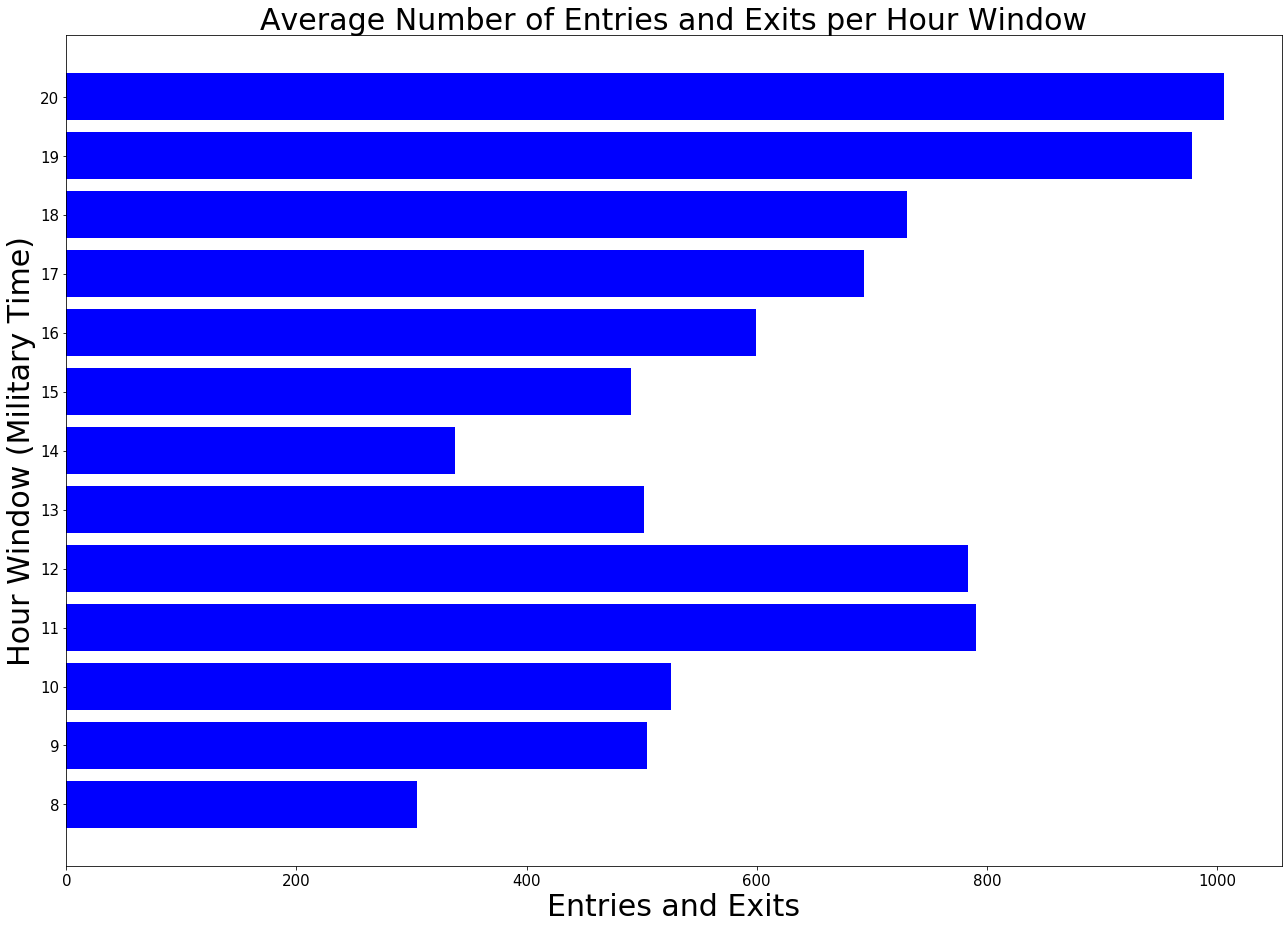

In [162]:
hour_list = list(range(13))
plt.figure(figsize = [18,13])
plt.barh(hour_list, width=ts_wd_top30_hourly_df['Cum. Entries & Exits'], height=0.8, align='center', color = 'blue')
plt.xticks(fontsize = 15);
plt.yticks(hour_list, ts_wd_top30_hourly_df['hour'], fontsize = 15);

plt.xlabel('Entries and Exits', fontsize = 30)
plt.ylabel('Hour Window (Military Time)', fontsize = 30);
plt.title('Average Number of Entries and Exits per Hour Window',fontsize = 30);
plt.tight_layout()